# **MLSC Data Science & Machine Learning**
## **E-Commerce Customer Segmentation**
## Abdallah Fekry Mohammed
### (Graduation Project 2)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [27]:
customers = pd.read_excel("E-commerce_data.xlsx", sheet_name='customers')
customers.head()

,customer_id,join_date,city_id,gender_id
0,1,2022-01-08,7,1
1,2,2023-05-02,20,2
2,3,2023-05-14,15,1
3,4,2022-11-25,11,2
4,5,2023-04-26,8,1


In [3]:
genders = pd.read_excel("E-commerce_data.xlsx", sheet_name='genders')
genders.head()

,gender_id,gender_name
0,1,Male
1,2,Female


In [4]:
cities = pd.read_excel("E-commerce_data.xlsx", sheet_name='cities')
cities.head()

,city_id,city_name
0,1,Cairo
1,2,Alexandria
2,3,Giza
3,4,Shubra El-Kheima
4,5,Port Said


In [5]:
cities = pd.read_excel("E-commerce_data.xlsx", sheet_name='cities')
cities.head()

,city_id,city_name
0,1,Cairo
1,2,Alexandria
2,3,Giza
3,4,Shubra El-Kheima
4,5,Port Said


In [6]:
transactions = pd.read_excel("E-commerce_data.xlsx", sheet_name='transactions')
transactions.head()

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6


In [7]:
transactions.transaction_status.unique()

array(['subscribed', 'burned'], dtype=object)

In [8]:
transactions.columns

Index(['transaction_id', 'customer_id', 'transaction_date',
       'transaction_status', 'coupon_name', 'burn_date', 'branch_id'],
      dtype='object')

In [9]:
branches = pd.read_excel("E-commerce_data.xlsx", sheet_name='branches')
branches.head()

,branch_id,merchant_id
0,1,11
1,2,18
2,3,8
3,4,15
4,5,9


In [10]:
merchants = pd.read_excel("E-commerce_data.xlsx", sheet_name='merchants')
merchants.head()

,merchant_id,merchant_name
0,1,Rivas Group
1,2,Peters-Acosta
2,3,"Duran, Perry and Stout"
3,4,Morton Ltd
4,5,Curtis-Fields


In [28]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  1000 non-null   int64         
 1   join_date    1000 non-null   datetime64[ns]
 2   city_id      1000 non-null   int64         
 3   gender_id    1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


In [29]:
customers.isnull().sum()

customer_id    0
join_date      0
city_id        0
gender_id      0
dtype: int64

In [30]:
customers.describe()

,customer_id,join_date,city_id,gender_id
count,1000.000000,1000,1000.000000,1000.000000
mean,500.500000,2023-01-15 07:29:16.800000,10.136000,1.491000
min,1.000000,2021-07-18 00:00:00,1.000000,1.000000
25%,250.750000,2022-04-08 18:00:00,5.000000,1.000000
50%,500.500000,2023-01-05 12:00:00,10.000000,1.000000
75%,750.250000,2023-10-27 00:00:00,15.000000,2.000000
max,1000.000000,2024-07-13 00:00:00,20.000000,2.000000
std,288.819436,NaN,5.895953,0.500169


In [31]:
customers.head()

,customer_id,join_date,city_id,gender_id
0,1,2022-01-08,7,1
1,2,2023-05-02,20,2
2,3,2023-05-14,15,1
3,4,2022-11-25,11,2
4,5,2023-04-26,8,1


<Axes: title={'center': 'Correlation Heatmap'}>

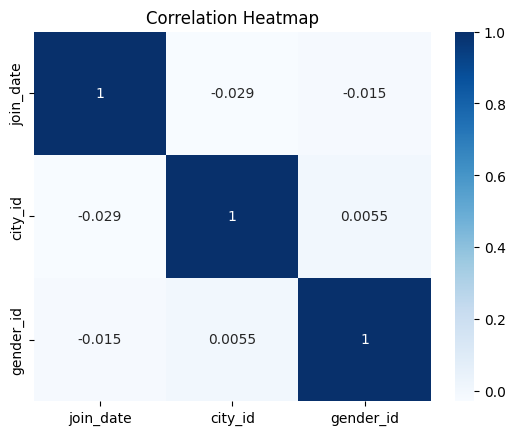

In [32]:
plt.title("Correlation Heatmap")
sns.heatmap(customers.drop('customer_id', axis=1).corr(), annot=True, cmap='Blues')

In [33]:
customers.gender_id.unique()

array([1, 2], dtype=int64)

In [34]:
transactions.columns

Index(['transaction_id', 'customer_id', 'transaction_date',
       'transaction_status', 'coupon_name', 'burn_date', 'branch_id'],
      dtype='object')

In [35]:
customers.columns

Index(['customer_id', 'join_date', 'city_id', 'gender_id'], dtype='object')

In [36]:
transactions

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6
...,...,...,...,...,...,...,...
4995,4996,776,2024-03-20,subscribed,OSq-518,NaT,1
4996,4997,583,2024-06-27,subscribed,FsJ-607,NaT,2
4997,4998,504,2022-11-08,burned,WcY-330,2022-12-06,2
4998,4999,876,2024-05-05,burned,bgx-731,2024-07-29,7


In [37]:
df = pd.merge(customers,transactions, on='customer_id')
df.head()

,customer_id,join_date,city_id,gender_id,transaction_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id
0,1,2022-01-08,7,1,178,2022-07-30,subscribed,SrP-866,NaT,8
1,1,2022-01-08,7,1,257,2022-09-19,burned,krI-075,2022-11-05,1
2,1,2022-01-08,7,1,1652,2022-06-09,burned,quk-137,2022-07-19,6
3,1,2022-01-08,7,1,1929,2022-07-30,burned,QiG-754,2022-10-18,8
4,1,2022-01-08,7,1,2352,2023-03-24,subscribed,OtC-985,NaT,4


In [38]:
df.drop('join_date', axis=1, inplace=True)
df.drop('burn_date', axis=1, inplace=True)
df.drop('transaction_date', axis=1, inplace=True)
df.head()

,customer_id,city_id,gender_id,transaction_id,transaction_status,coupon_name,branch_id
0,1,7,1,178,subscribed,SrP-866,8
1,1,7,1,257,burned,krI-075,1
2,1,7,1,1652,burned,quk-137,6
3,1,7,1,1929,burned,QiG-754,8
4,1,7,1,2352,subscribed,OtC-985,4


In [39]:
df.transaction_status.unique()

array(['subscribed', 'burned'], dtype=object)

In [40]:
len(df.coupon_name.unique())

5000

In [41]:
df.transaction_status = df.transaction_status.astype('category').cat.codes
df.head()

,customer_id,city_id,gender_id,transaction_id,transaction_status,coupon_name,branch_id
0,1,7,1,178,1,SrP-866,8
1,1,7,1,257,0,krI-075,1
2,1,7,1,1652,0,quk-137,6
3,1,7,1,1929,0,QiG-754,8
4,1,7,1,2352,1,OtC-985,4


In [42]:
x = df.drop('customer_id', axis=1).drop('transaction_id', axis=1).drop('coupon_name', axis=1)
x.head()

,city_id,gender_id,transaction_status,branch_id
0,7,1,1,8
1,7,1,0,1
2,7,1,0,6
3,7,1,0,8
4,7,1,1,4


In [43]:
pca = PCA(n_components=2)
x = pca.fit_transform(x)
x

array([[-3.11648776, -2.43482973],
       [-3.04341517,  4.56466026],
       [-3.09582352, -0.43498469],
       ...,
       [-4.0643219 ,  2.575294  ],
       [-8.11801016, -2.3880226 ],
       [-8.04493758,  4.61146738]])

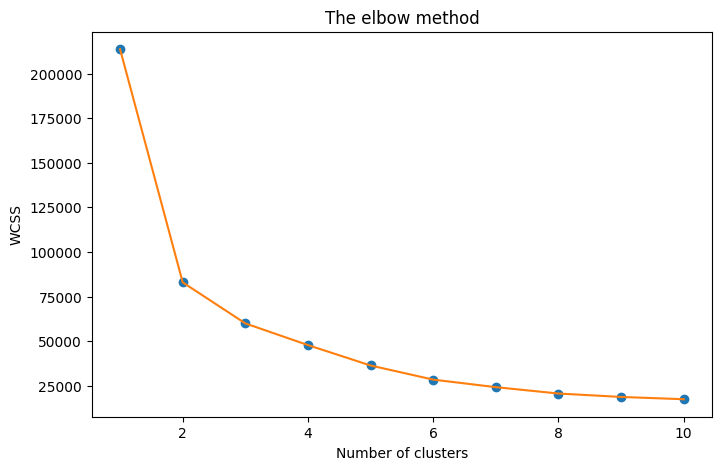

In [44]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.figure(1, figsize=(8,5))
plt.plot(range(1, 11), wcss, 'o')
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [45]:
model = KMeans(n_clusters = 5, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
model.fit(x)
yp = model.predict(x)

In [46]:
labels = model.labels_
centroids = model.cluster_centers_
print("Labels/Clusters:",labels, "\nCentroids:",centroids,sep='\n')

Labels/Clusters:
[3 0 3 ... 0 4 0]

Centroids:
[[-5.20339864e+00  2.65967666e+00]
 [ 7.25250058e+00 -1.90541148e+00]
 [ 4.77726824e+00  2.99215673e+00]
 [-5.43098080e-03 -1.83935374e+00]
 [-6.96880429e+00 -2.29567167e+00]]


In [47]:
x = pd.DataFrame(x)

In [48]:
x.head()

,0,1
0,-3.116488,-2.434830
1,-3.043415,4.564660
2,-3.095824,-0.434985
3,-3.116787,-2.434843
4,-3.074561,1.564886


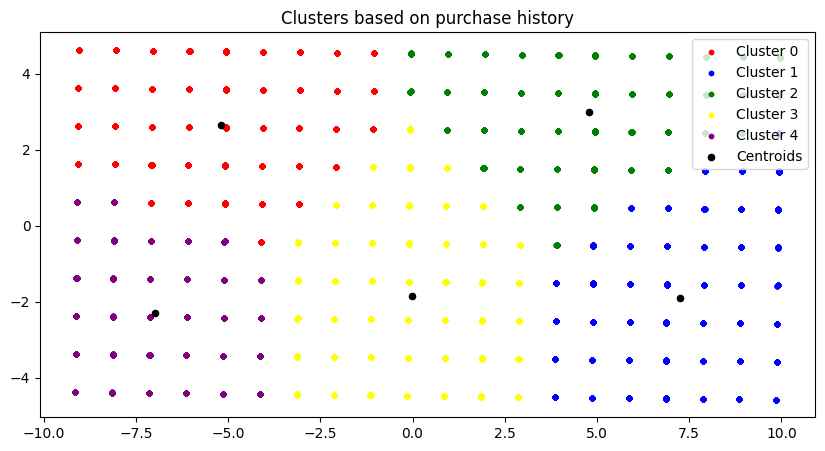

In [49]:
# Visualising the clusters
plt.figure(1, figsize=(10,5))
plt.scatter(x[yp==0].iloc[:,0], x[yp==0].iloc[:,1],
            s = 10, c = 'red', label = 'Cluster 0')
plt.scatter(x[yp==1].iloc[:,0], x[yp==1].iloc[:,1],
            s = 10, c = 'blue', label = 'Cluster 1')
plt.scatter(x[yp==2].iloc[:,0], x[yp==2].iloc[:,1],
            s = 10, c = 'green', label = 'Cluster 2')
plt.scatter(x[yp==3].iloc[:,0], x[yp==3].iloc[:,1],
            s = 10, c = 'yellow', label = 'Cluster 3')
plt.scatter(x[yp==4].iloc[:,0], x[yp==4].iloc[:,1],
            s = 10, c = 'purple', label = 'Cluster 4')
# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1],
            s = 20, c = 'black', label = 'Centroids')
plt.title('Clusters based on purchase history')
plt.legend()

In [50]:
len(x)

5000

In [51]:
df2 = pd.concat([df,pd.DataFrame(yp, columns=['cluster'])], axis=1)
df2.head()

,customer_id,city_id,gender_id,transaction_id,transaction_status,coupon_name,branch_id,cluster
0,1,7,1,178,1,SrP-866,8,3
1,1,7,1,257,0,krI-075,1,0
2,1,7,1,1652,0,quk-137,6,3
3,1,7,1,1929,0,QiG-754,8,3
4,1,7,1,2352,1,OtC-985,4,0


In [52]:
df2.cluster.value_counts(sort=False)

cluster
3    1013
0    1106
1    1014
2     972
4     895
Name: count, dtype: int64

<Axes: title={'center': 'Numbers of Customers per Cluster'}, xlabel='Clusters', ylabel='Number of Customers'>

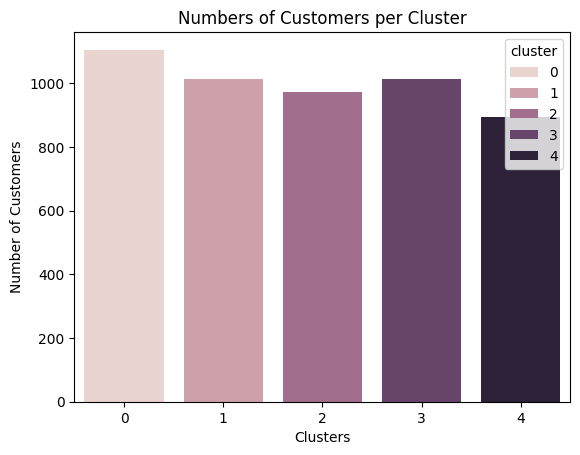

In [55]:
plt.title("Numbers of Customers per Cluster")
plt.xlabel("Clusters")
plt.ylabel("Number of Customers")
sns.countplot(x='cluster', data=df2, hue='cluster')

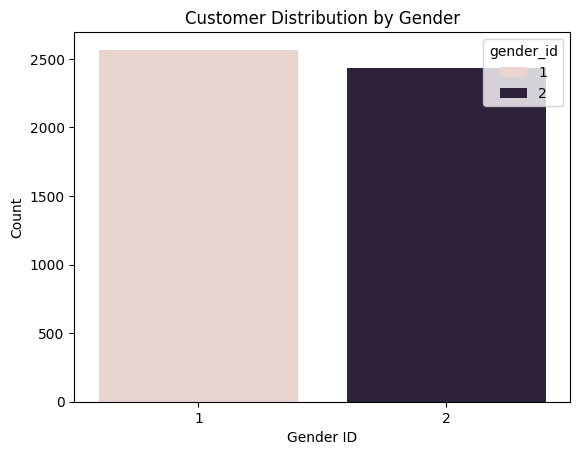

In [58]:
sns.countplot(x='gender_id', data=df2, hue='gender_id')
plt.title('Customer Distribution by Gender')
plt.xlabel('Gender ID')
plt.ylabel('Count')
plt.show()

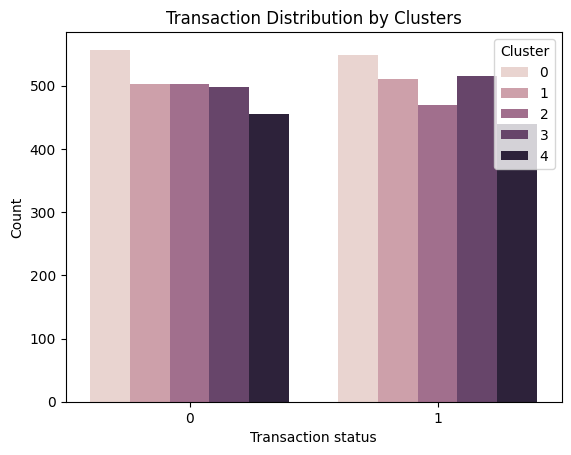

In [74]:
sns.countplot(x='transaction_status', data=df2, hue='cluster')
plt.title('Transaction Distribution by Clusters')
plt.xlabel('Transaction status')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()

In [101]:
df2.groupby('cluster').coupon_name.count()

cluster
0    1106
1    1014
2     972
3    1013
4     895
Name: coupon_name, dtype: int64

In [107]:
sorted(df2.cluster.unique())

[0, 1, 2, 3, 4]

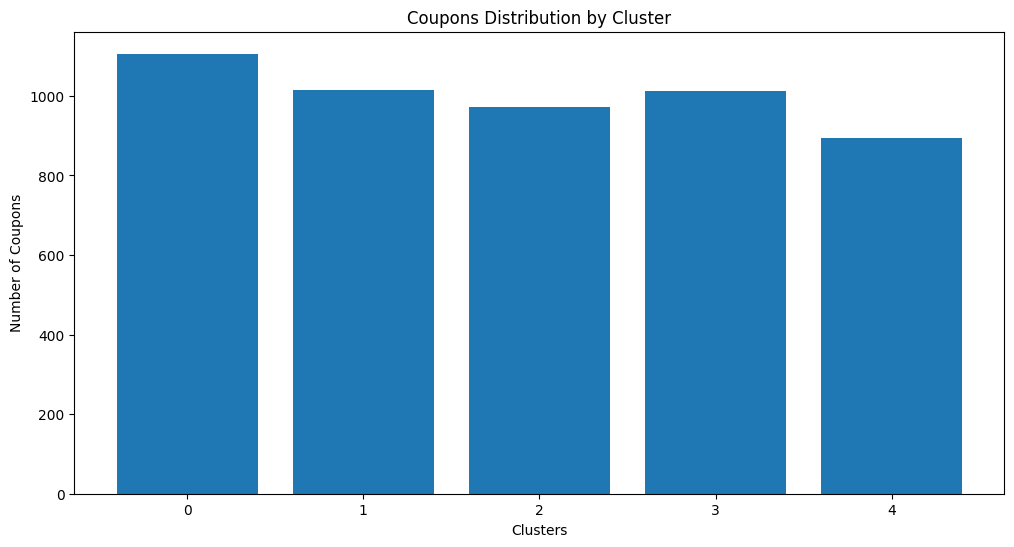

In [116]:
plt.figure(figsize=(12,6))
plt.bar(sorted(df2.cluster.unique()), df2.groupby('cluster').coupon_name.count())
plt.title('Coupons Distribution by Cluster')
plt.xlabel('Clusters')
plt.ylabel('Number of Coupons')
plt.show()

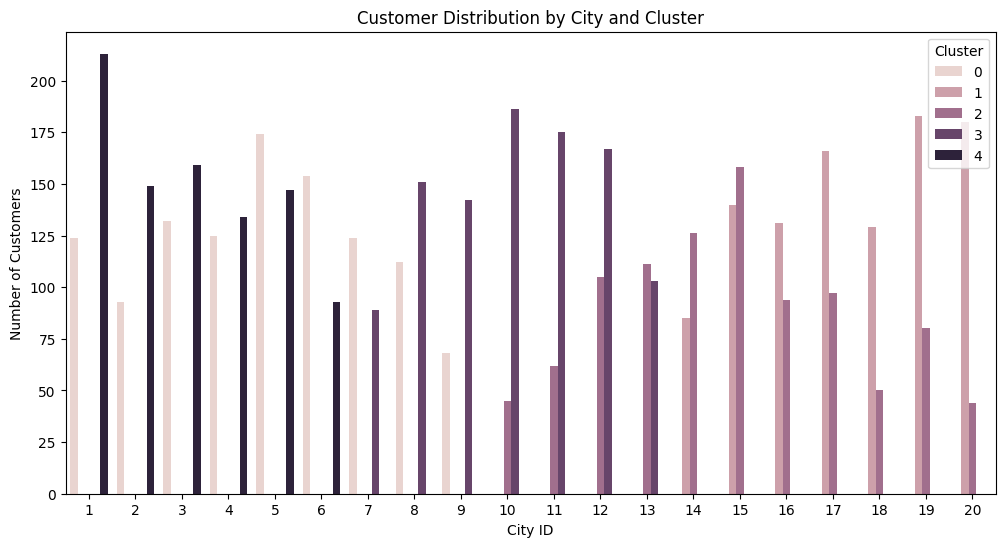

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(data=df2, x='city_id', hue='cluster')
plt.title('Customer Distribution by City and Cluster')
plt.xlabel('City ID')
plt.ylabel('Number of Customers')
plt.legend(title='Cluster')
plt.show()


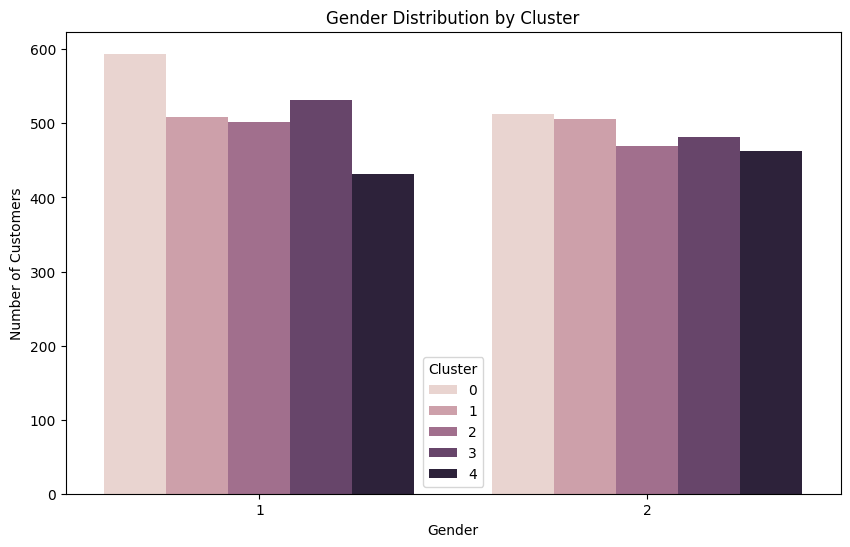

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(data=df2, x='gender_id', hue='cluster')
plt.title('Gender Distribution by Cluster')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Cluster')
plt.show()


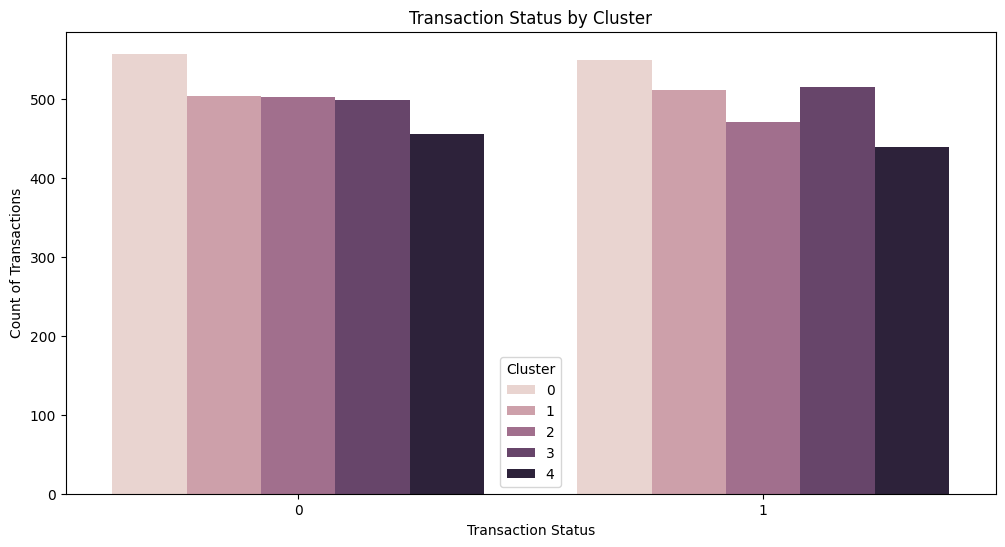

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(data=df2, x='transaction_status', hue='cluster')
plt.title('Transaction Status by Cluster')
plt.xlabel('Transaction Status')
plt.ylabel('Count of Transactions')
plt.legend(title='Cluster')
plt.show()


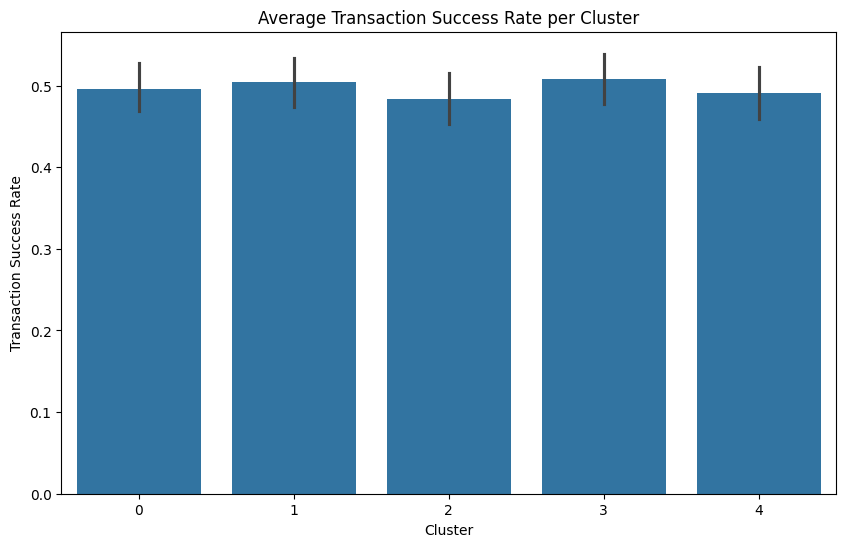

In [314]:
plt.figure(figsize=(10,6))
sns.barplot(data=df2, x='cluster', y='transaction_status', estimator='mean')
plt.title('Average Transaction Success Rate per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Transaction Success Rate')
plt.show()


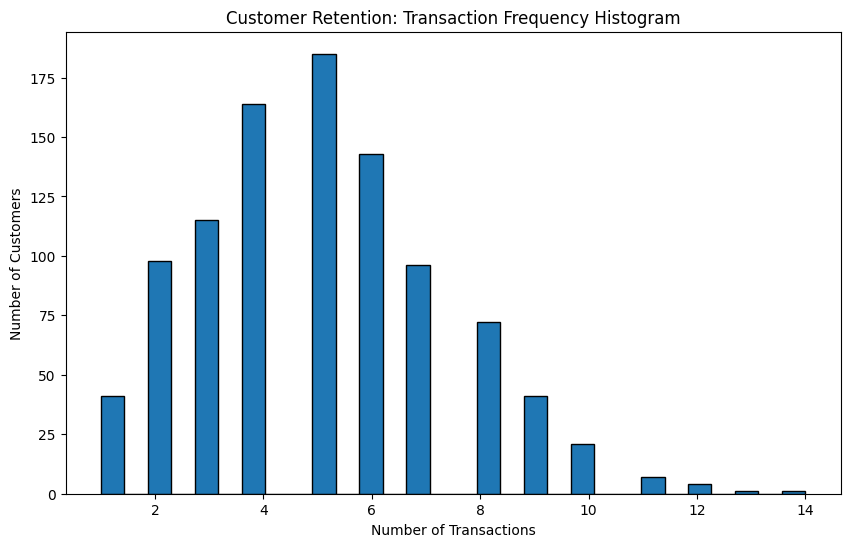

In [318]:
# Grouping customers by the number of transactions
transaction_counts = df2.groupby('customer_id')['transaction_id'].count()

# Plotting the histogram for customer retention (transaction frequency)
plt.figure(figsize=(10,6))
plt.hist(transaction_counts, bins=30, edgecolor='black')
plt.title('Customer Retention: Transaction Frequency Histogram')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()


---
---

## Conclusion
The Least cluster have transactions and coupons is Cluster 4, so we need to target them in coupons offers.

The most of customers belongs to Cluster 4 are from country 1,3, and 5 which are Alexandria, Shubra El-Kheima, and Suez. Therefore, we need to target these areas in advertising.

Both Cluster 2 and Cluster 4 have a number of burned transactions more than the subscribed, so they doesn't renew their subscription, so we can to target them in coupon offers to increase their loyality.